# Importing data and libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
#Alcohol_Type counts
data.Type.value_counts().sort_index()

,count
Type,
1,59
2,71
3,48


In [ ]:
#All unique values in every feature
data.nunique()

,0
Type,3
Alcohol,126
Malic,133
Ash,79
Alcalinity,63
Magnesium,53
Phenols,97
Flavanoids,132
Nonflavanoids,39
Proanthocyanins,101


In [ ]:
data.duplicated().sum() #Checking for duplicated rows

np.int64(0)

In [ ]:
data.isna().sum() #Checking for null values

,0
Type,0
Alcohol,0
Malic,0
Ash,0
Alcalinity,0
Magnesium,0
Phenols,0
Flavanoids,0
Nonflavanoids,0
Proanthocyanins,0


# EDA

### Box Plots

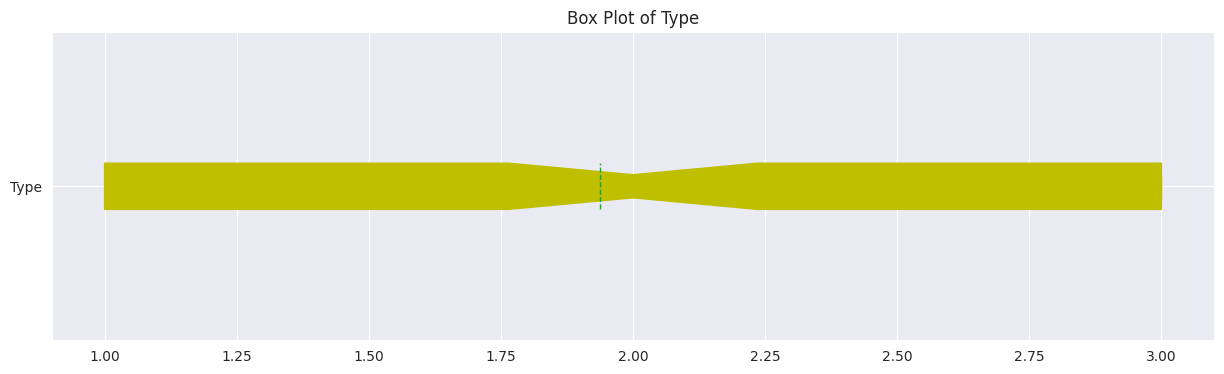

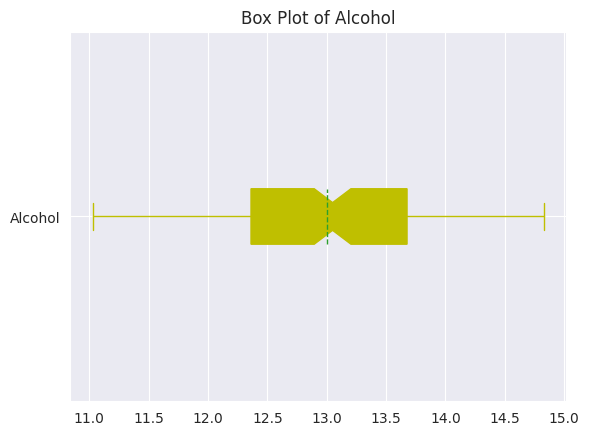

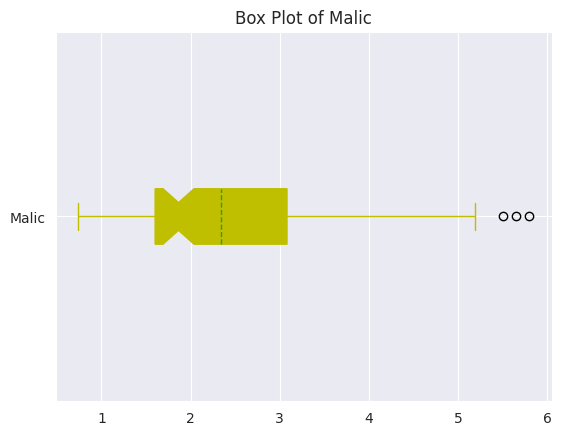

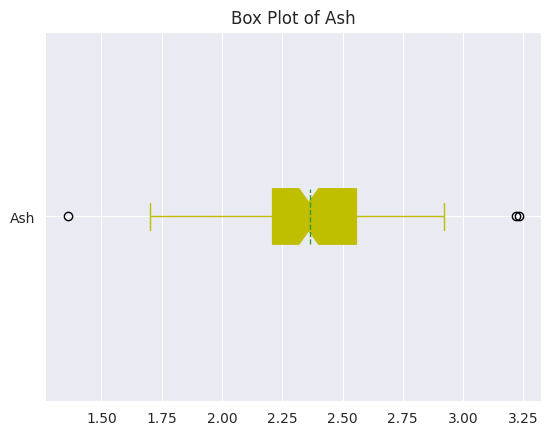

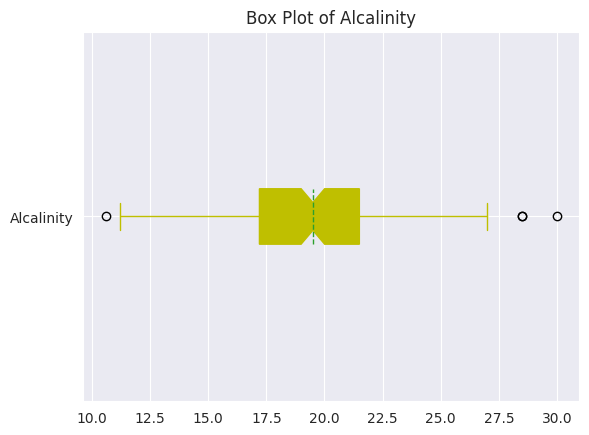

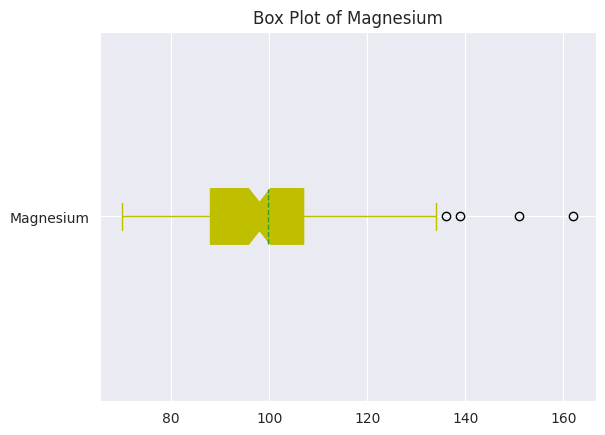

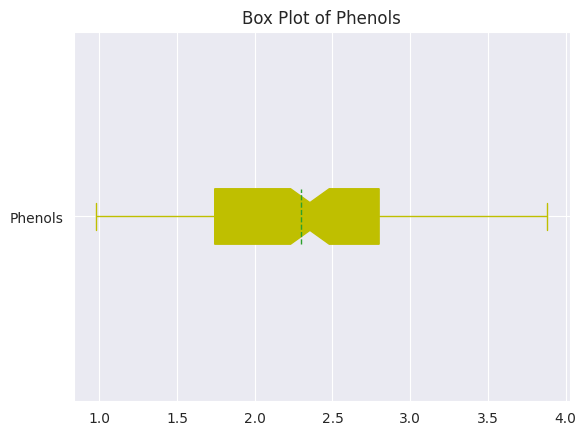

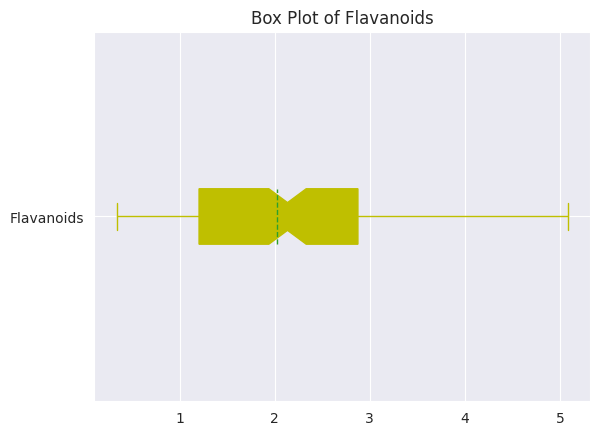

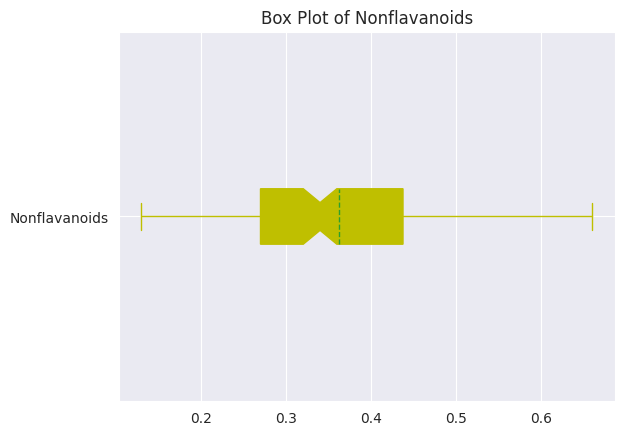

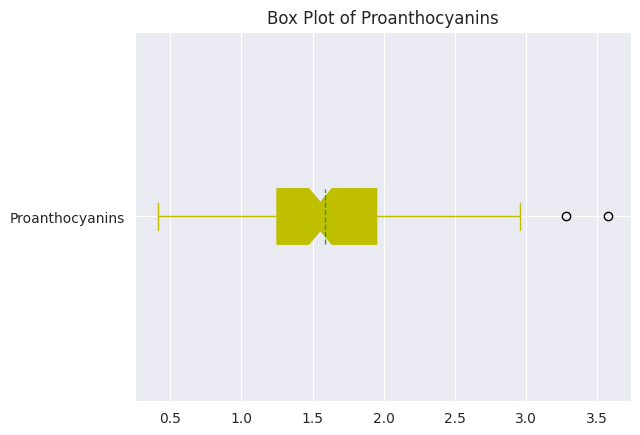

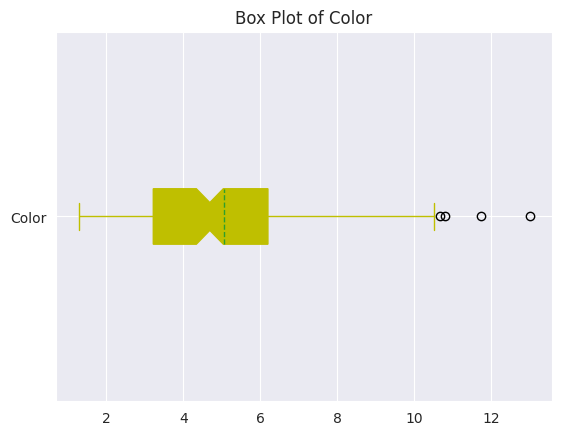

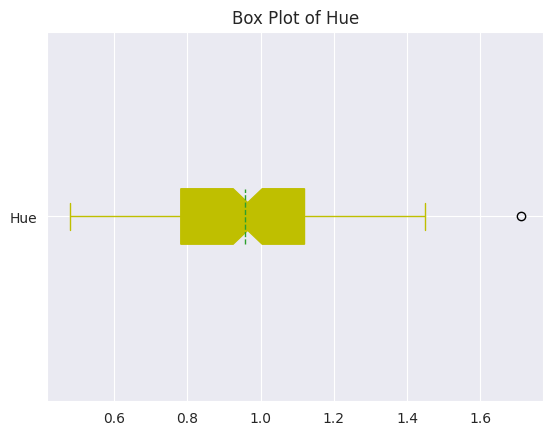

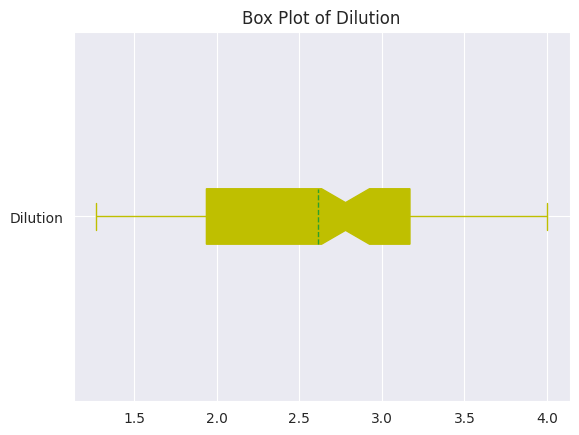

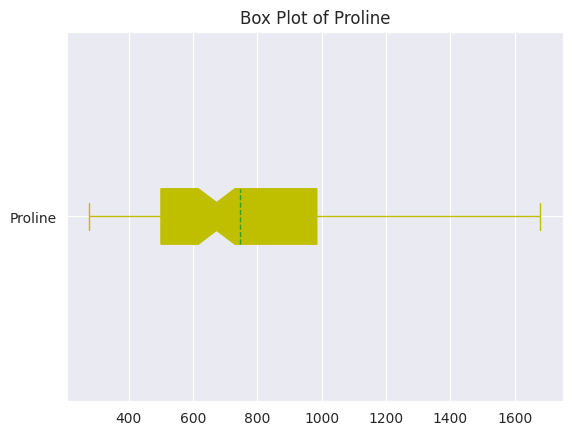

In [ ]:
#Box Plots
plt.figure(figsize = (15,4))
sns.set_style('darkgrid')
for col in data.columns:
  data[col].plot(kind = 'box', vert= False, showmeans = True, meanline = True,
                 notch = True, patch_artist = True, color = 'y')
  plt.title(f'Box Plot of {col}')
  plt.show()

### Histogram Plots

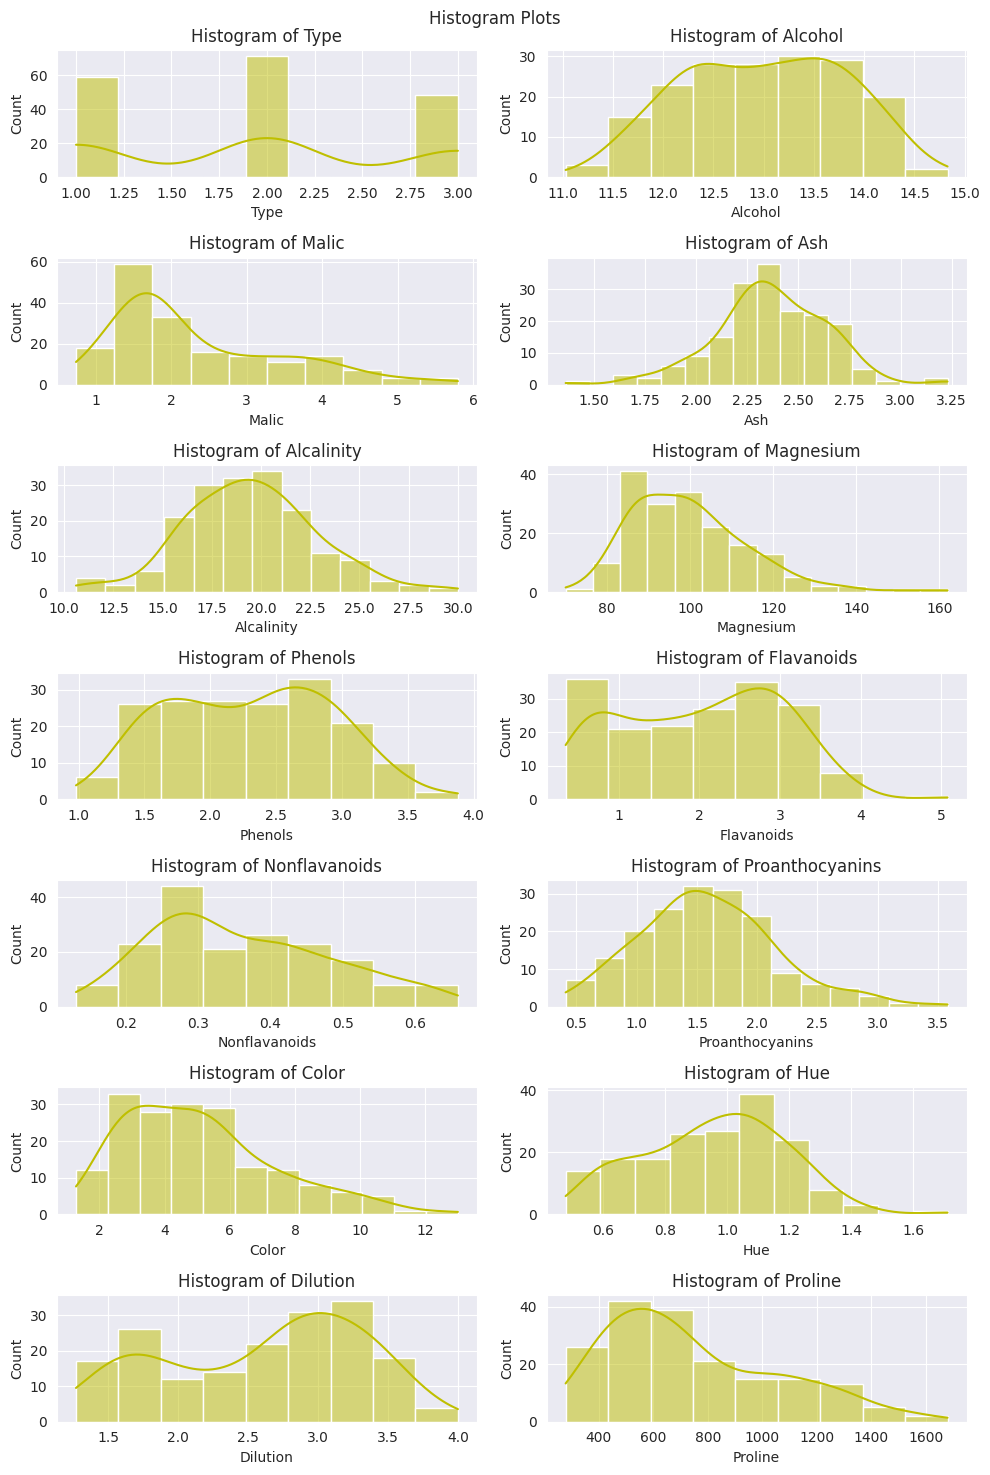

In [ ]:
n_rows = int(np.ceil(len(data.columns)/2))
p = 1
sns.set_style('darkgrid')
plt.figure(figsize= (10,15))
plt.suptitle('Histogram Plots')

for col in data.columns:
  plt.subplot(n_rows,2,p)
  sns.histplot(data[col], kde = True, color ='y')
  plt.title(f'Histogram of {col}')
  plt.tight_layout()
  p+=1
plt.show()

FRom the above plots it is observed that the features have very less outliers and the distribution of the data in not normal. Most of the features are skewed and the kurtosis is not visible. This tells the data is spreaded out.

### Counting the number of outliers

In [ ]:
outlier_counts = {}

for col in data.columns:
  Q1 = data[col].quantile(0.25)
  Q3 = data[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  outliers = data[(data[col]>upper_bound) | (data[col]<lower_bound)]
  outlier_counts[col] = len(outliers)
print(f'Outlier_counts')
for col, counts in outlier_counts.items():
  print(f'{col}: {counts}')


Outlier_counts
Type: 0
Alcohol: 0
Malic: 3
Ash: 3
Alcalinity: 4
Magnesium: 4
Phenols: 0
Flavanoids: 0
Nonflavanoids: 0
Proanthocyanins: 2
Color: 4
Hue: 1
Dilution: 0
Proline: 0


The count of outliers are very less near to zero in each features. No need of transforming the data in terms of outliers.

### Correlation Matrix

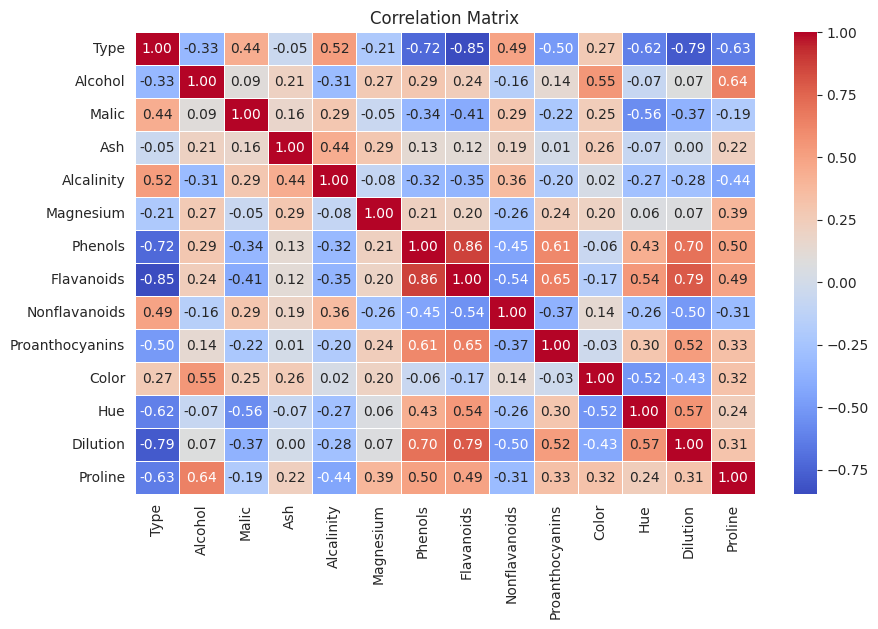

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm', linewidth = 0.5,
            fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

Few features like Phenols, Flavanoids, Proanthocyanins, Dilution were involved in multicollinearity. Lets proceed forward without removing these features as we're going to do the PCA it will handle the issue.

# Preprocessing the data

### Standardizing the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df = data.copy()

In [ ]:
df.drop('Type', axis = 1, inplace = True)

In [ ]:
df_scaled  = scaler.fit_transform(df)

# Dimensionality Reduction with PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
#Applying the PCA concept with 10 components
pca = PCA(n_components = 12)
pcomps = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pcomps, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

In [ ]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366
...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490


### Cumulative sum of variance

In [ ]:
#Checking how much variance explained
ratios = pca.explained_variance_ratio_

In [ ]:
cum_var = np.cumsum(ratios) #cumulative sum of ratios to know the variance explained

In [ ]:
cum_var

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717])

In [ ]:
optimal_components = np.argmax(np.cumsum(ratios)>=0.95)

In [ ]:
optimal_components

np.int64(9)

### Scree Plot

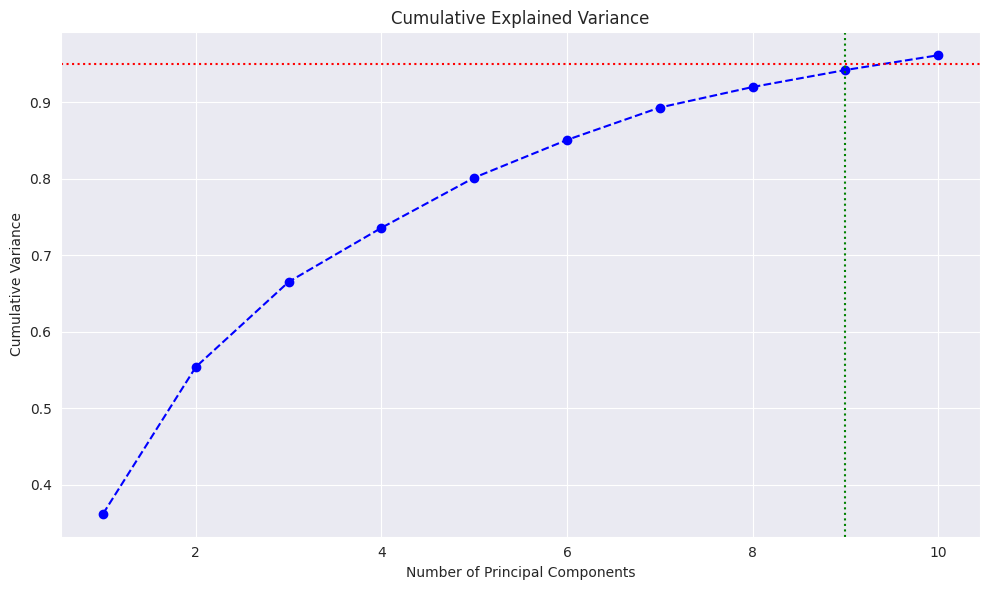

In [ ]:
#Plotting the Variance and components to visualize the optimal components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='--', color='blue')
plt.axhline(y=0.95, color='red', linestyle=':')
plt.axvline(x=optimal_components, color='green', linestyle=':')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

From the cumulative variances i have opted 9 components for the PCA features. 95% of variance is captured with 9 PCA's.

### Building Final PCA

In [ ]:
pca9 = PCA(n_components = 9)
pcomp9 = pca9.fit_transform(df_scaled)
pca9_df = pd.DataFrame(pcomp9, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
pca9_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819
...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448


In [ ]:
#pca9_df = pd.concat([pca9_df, data['Type']], axis = 1)

# Clustering with Original Data

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans

#### Cluster with wcss score

In [ ]:
wcss = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df_scaled)
  wcss.append(kmeans.inertia_)
  print(f'WCSS for clusters {i}: {kmeans.inertia_}')

WCSS for clusters 2: 1661.6761165626497
WCSS for clusters 3: 1277.928488844643
WCSS for clusters 4: 1211.753113467159
WCSS for clusters 5: 1123.1565470796968
WCSS for clusters 6: 1079.5385091588266
WCSS for clusters 7: 1014.4309086924653
WCSS for clusters 8: 982.6549762937693
WCSS for clusters 9: 927.9560760726207
WCSS for clusters 10: 879.4257007542493


### K-Elbow plot for optimal clusters

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

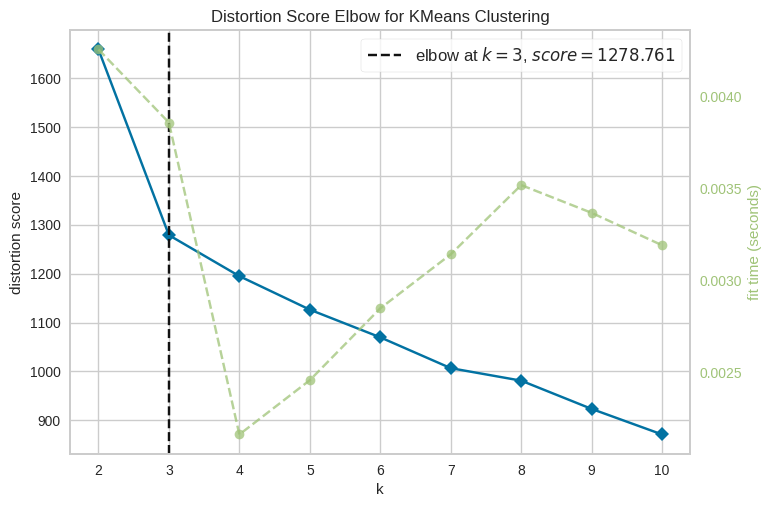

In [ ]:
visz = KElbowVisualizer(KMeans(), k = 10)
visz.fit(df_scaled)
visz.poof()
plt.show()

### Silhouette Score and Davies Bouldin Index

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
sil_scores= []
db_scores = []
for i in range(2,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  labels = kmeans.fit_predict(df_scaled)
  sil_score = silhouette_score(df_scaled, labels)
  db_score = davies_bouldin_score(df_scaled, labels)
  sil_scores.append(sil_score)
  db_scores.append(db_score)
  print(f'Silhoutte Score for {i} clusters: {sil_score:.4f}')
  print(f'Davies Bouldin Score for {i} clusters: {db_score:.4f}')

Silhoutte Score for 2 clusters: 0.2650
Davies Bouldin Score for 2 clusters: 1.4944
Silhoutte Score for 3 clusters: 0.2849
Davies Bouldin Score for 3 clusters: 1.3892
Silhoutte Score for 4 clusters: 0.2542
Davies Bouldin Score for 4 clusters: 1.6954
Silhoutte Score for 5 clusters: 0.1836
Davies Bouldin Score for 5 clusters: 1.9120
Silhoutte Score for 6 clusters: 0.1690
Davies Bouldin Score for 6 clusters: 1.9310
Silhoutte Score for 7 clusters: 0.1726
Davies Bouldin Score for 7 clusters: 1.7017
Silhoutte Score for 8 clusters: 0.1625
Davies Bouldin Score for 8 clusters: 1.8437
Silhoutte Score for 9 clusters: 0.1739
Davies Bouldin Score for 9 clusters: 1.6434
Silhoutte Score for 10 clusters: 0.1396
Davies Bouldin Score for 10 clusters: 1.7190


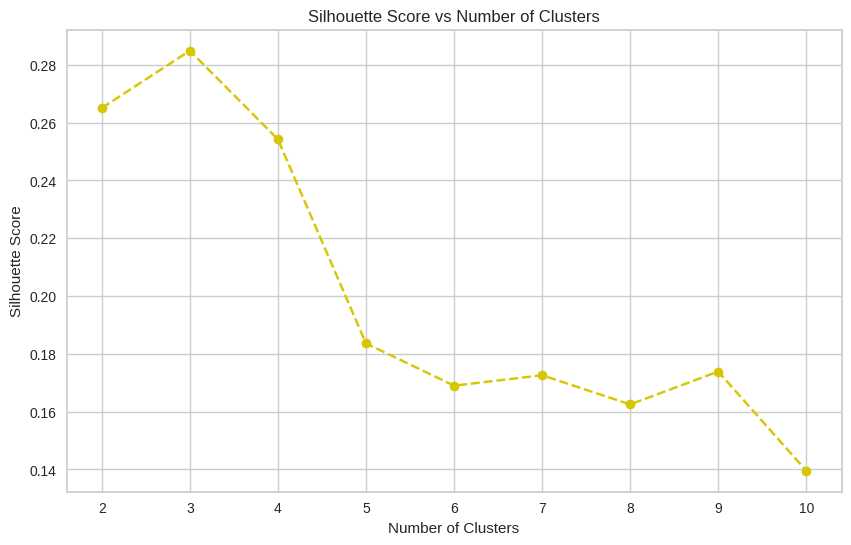

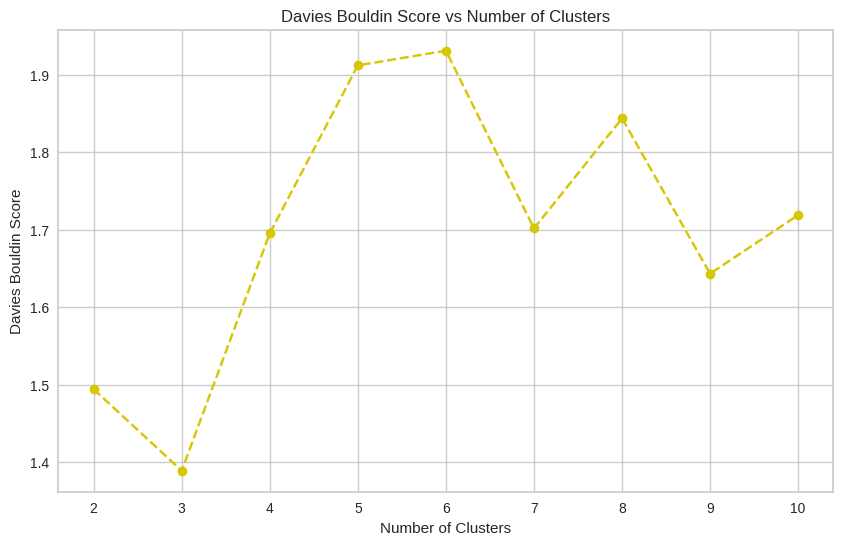

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(2,11), sil_scores, marker = 'o', linestyle = '--', color ='y')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

plt.figure(figsize = (10,6))
plt.plot(range(2,11), db_scores, marker = 'o', linestyle = '--', color ='y')
plt.title('Davies Bouldin Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.grid(True)
plt.show()

Silhouette Score - 3 clusters have the highest score.

Davies Bouldin Score - 3 clusters have less similarity and can separate the data better.

From the data it is evident that 3 clusters were ideal for the data based on Type feature. But to check what KMeans algorithm gives i performed the parameter tuning to get the best wcss score and this too gave 3 as ideal custers. The Silhouette scores and Davies Bouldin Score tells the same to go with 3 clusters.

### Building the final model with K-Means

In [ ]:
k_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_model.fit(df_scaled)
k_labels = k_model.labels_

In [ ]:
df['Clusters'] = k_labels

In [ ]:
df.Clusters.value_counts().sort_index()

,count
Clusters,
0,65
1,51
2,62


# Clustering with PCA Data:

In [ ]:
pca_wcss = []
pca_sil = []
pca_db = []
for i in range(2,11):
  pca_kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
  pca_kmeans.fit(pca9_df)
  pca_kmeans_labels = pca_kmeans.labels_
  pca_sil_score = silhouette_score(pca9_df, pca_kmeans_labels)
  pca_db_score = davies_bouldin_score(pca9_df, pca_kmeans_labels)

  pca_wcss.append(pca_kmeans.inertia_)
  pca_sil.append(pca_sil_score)
  pca_db.append(pca_db_score)

  print(f'WCSS for {i} clusters: {pca_kmeans.inertia_}')
  print('-'*50)
  print(f'Silhouette Score for {i} clusters: {pca_sil_score:.4f}')
  print('-'*50)
  print(f'Davies Bouldin Score for {i} clusters: {pca_db_score:.4f}')
  print('-'*50)

WCSS for 2 clusters: 1525.819183376895
--------------------------------------------------
Silhouette Score for 2 clusters: 0.2854
--------------------------------------------------
Davies Bouldin Score for 2 clusters: 1.3811
--------------------------------------------------
WCSS for 3 clusters: 1145.551361992926
--------------------------------------------------
Silhouette Score for 3 clusters: 0.3058
--------------------------------------------------
Davies Bouldin Score for 3 clusters: 1.3037
--------------------------------------------------
WCSS for 4 clusters: 1076.8651012179175
--------------------------------------------------
Silhouette Score for 4 clusters: 0.2282
--------------------------------------------------
Davies Bouldin Score for 4 clusters: 1.6376
--------------------------------------------------
WCSS for 5 clusters: 984.7417766151739
--------------------------------------------------
Silhouette Score for 5 clusters: 0.1966
-----------------------------------------

### Visualizing the scores with Clusters

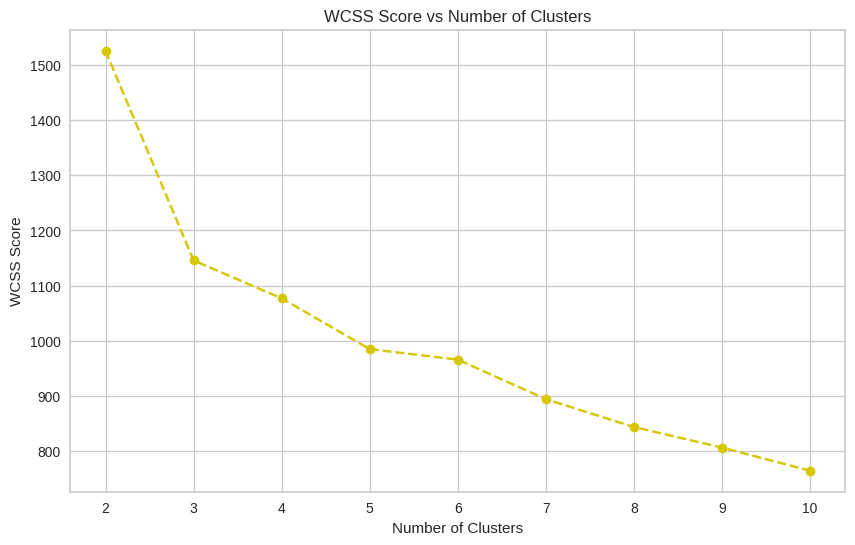

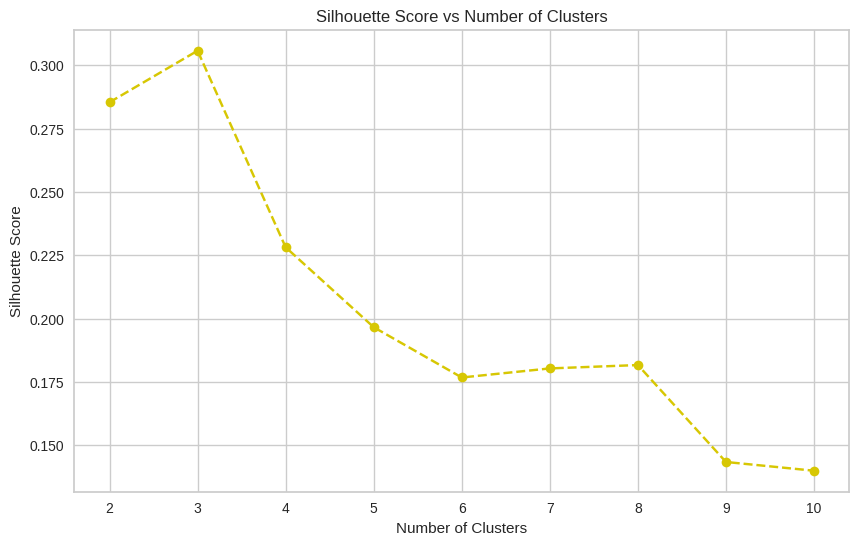

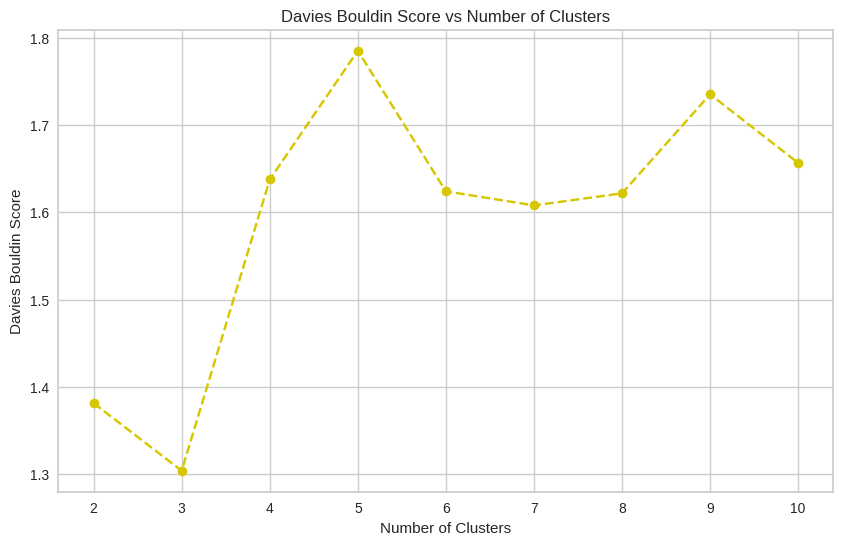

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(2,11), pca_wcss, marker = 'o', linestyle = '--', color ='y')
plt.title('WCSS Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')
plt.grid(True)
plt.show()

plt.figure(figsize = (10,6))
plt.plot(range(2,11), pca_sil, marker = 'o', linestyle = '--', color ='y')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

plt.figure(figsize = (10,6))
plt.plot(range(2,11), pca_db, marker = 'o', linestyle = '--', color ='y')
plt.title('Davies Bouldin Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.grid(True)
plt.show()

### KElbow Plot

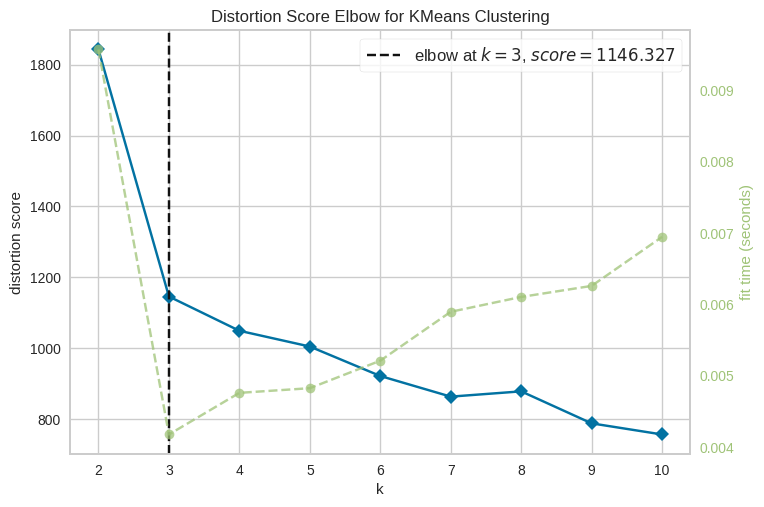

In [ ]:
pca_viz = KElbowVisualizer(KMeans(), k = range(2,11))
pca_viz.fit(pca9_df)
pca_viz.poof()
plt.show()

From the above visualizations and metrics it is clear that 3 is optimal for segregating the clusters.

### Building the final model for the PCA Data

In [ ]:
pca_k_model = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
pca_k_model.fit(pca9_df)
pca_k_labels = pca_k_model.labels_

In [ ]:
pca9_df['Clusters'] = pca_k_labels

# Comparing the Metric Scores

[np.float64(0.2854188903582531),
 np.float64(0.3057833815147918),
 np.float64(0.22816290210495482),
 np.float64(0.19660325020539413),
 np.float64(0.17674442471052965),
 np.float64(0.1803277922797541),
 np.float64(0.18166069091706685),
 np.float64(0.14338114510246075),
 np.float64(0.1399298755340687)]

In [ ]:
metrics_df = pd.DataFrame({
    'Clusters': range(2,11),
    'WCSS_OG': wcss,
    'WCSS_PCA': pca_wcss,
    'Silhouette Score_OG': sil_scores,
    'Silhouette Score_PCA': pca_sil,
    'Davies Bouldin Score_OG': db_scores,
    'Davies Bouldin Score_PCA': pca_db
})


In [ ]:
metrics_df.set_index('Clusters', inplace = True)

In [ ]:
metrics_df

,WCSS_OG,WCSS_PCA,Silhouette Score_OG,Silhouette Score_PCA,Davies Bouldin Score_OG,Davies Bouldin Score_PCA
Clusters,,,,,,
2,1661.676117,1525.819183,0.265033,0.285419,1.494381,1.381102
3,1277.928489,1145.551362,0.284859,0.305783,1.389188,1.303671
4,1211.753113,1076.865101,0.254228,0.228163,1.695418,1.637603
5,1123.156547,984.741777,0.183621,0.196603,1.912031,1.785266
6,1079.538509,965.730477,0.168992,0.176744,1.930961,1.624043
7,1014.430909,894.011341,0.172602,0.180328,1.701746,1.607910
8,982.654976,843.505036,0.162504,0.181661,1.843728,1.621730
9,927.956076,806.235092,0.173874,0.143381,1.643381,1.735273
10,879.425701,764.256044,0.139567,0.139930,1.719017,1.656600


# Visualizing the Clusters

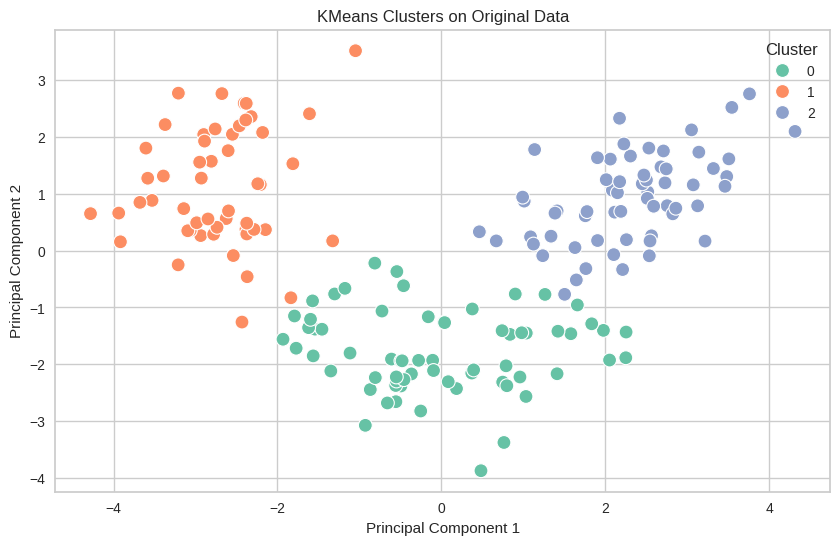

In [ ]:
#original scaled data to 2 cpca components
pca_vis = PCA(n_components=2)
original_2d = pca_vis.fit_transform(df_scaled)

# Adding cluster labels from original KMeans
original_df = pd.DataFrame(original_2d, columns=['PC1', 'PC2'])
original_df['Cluster'] = k_model.labels_

# Ploting the data to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=original_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('KMeans Clusters on Original Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


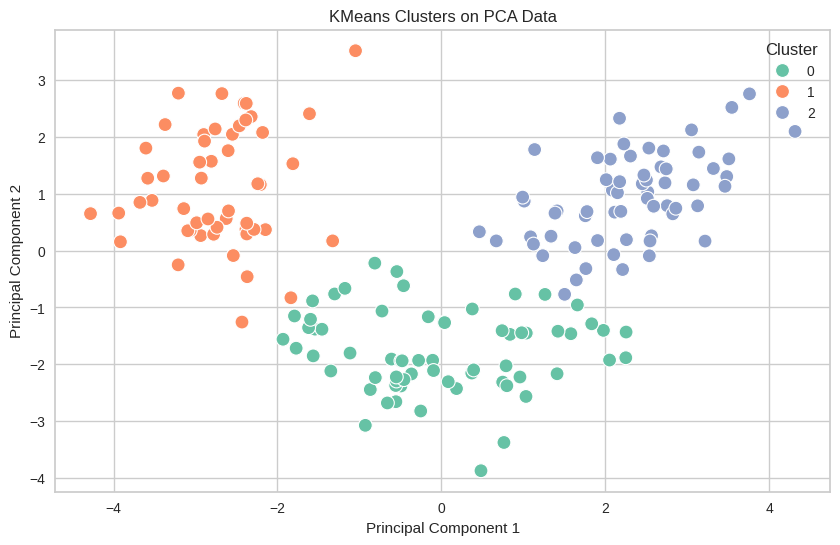

In [ ]:
# PCA data to 2 components
pca_vis2 = PCA(n_components=2)
pca_2d = pca_vis2.fit_transform(pca9_df.drop('Clusters', axis=1))

#adding cluster labels from PCA KMeans
pca_vis_df = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])
pca_vis_df['Cluster'] = pca_k_model.labels_

#ploting the data to visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_vis_df, x='PC1', y='PC2', hue='Cluster', palette='Set2', s=100)
plt.title('KMeans Clusters on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


# Comparison and Analysis:

1. Comparison of Clustering Results (Original vs PCA Data)

Both approaches identified 3 clusters as optimal using WCSS, Silhouette Score, and Davies Bouldin Index.

PCA-transformed data had slightly better metric scores (Silhouette: 0.3058 vs 0.2849; DB Index: 1.3037 vs 1.3892), but the visual cluster separation was not significantly different.

2. Similarities and Differences Observed

Similarities:

Both methods converged on 3 clusters.

Cluster assignments aligned well with the 'Type' feature.

Visualizations showed comparable cluster spread and overlap.

Differences:

PCA offered marginal improvements in evaluation metrics.

Original data retained feature interpretability, while PCA components are abstract.

3. Impact of Dimensionality Reduction on Clustering

PCA helped reduce multicollinearity and dimensionality, which slightly improved clustering metrics.

However, it did not significantly enhance visual separation in 2D PCA plots.

#  Conclusion and Insights

1. Key Findings and Insights

Data Characteristics: The dataset showed minimal outliers and significant skewness across features. Several variables exhibited multicollinearity, especially Phenols, Flavanoids, and Proanthocyanins.

Dimensionality Reduction: PCA was applied to reduce the feature space while retaining 95% of the variance using 9 principal components. This helped mitigate multicollinearity and improved computational efficiency.

Clustering Evaluation:

Both original and PCA-transformed data consistently identified 3 clusters as optimal using WCSS, Silhouette Score, and Davies Bouldin Index.

PCA-based clustering yielded slightly better metrics (Silhouette: 0.3058 vs 0.2849; DB Index: 1.3037 vs 1.3892), though visual separation was comparable in both cases.

Cluster Alignment: The clusters aligned well with the 'Type' feature, suggesting that unsupervised clustering captured meaningful structure in the data.

2. Practical Implications of Using PCA and Clustering
PCA:

Reduces dimensionality, which is crucial for high-dimensional datasets.

Helps eliminate redundancy and noise caused by correlated features.

Speeds up clustering algorithms and improves stability of distance-based metrics.

Clustering:

Enables segmentation of data into meaningful groups without labels.

Useful for customer profiling, outliers detection, and feature grouping.

Evaluation metrics like Silhouette and DB Index provide objective ways to validate cluster quality.

3. Provide recommendations for when to use each technique based on the analysis conducted.

Principal Component Analysis (PCA) is recommended when working with high-dimensional datasets that shows multicollinearity or unrelated features. By transforming the original features into principal components, PCA reduces dimensionality while preserving the majority of the data's variance, which improves computational efficiency and stabilizes distance-based algorithms like KMeans.

Clustering algorithms such as KMeans are effective for unsupervised segmentation, especially when the input features are well-scaled and informative. If interpretability of individual features is critical—such as when explaining cluster characteristics clustering should be performed directly on the original feature space. But, when performance, noise reduction, and computational speed are prioritized, PCA followed by clustering gives accurate results in  most of the cases.